In [46]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn import datasets, ensemble
from sklearn.inspection import permutation_importance

In [47]:
# Load the datasets

df= pd.read_csv('data/finaldata.csv')
df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month,Day,Weekday
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12.55.00,ATA,TU 32AIMN,260.0,2016,1,3,6
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16.55.00,ATA,TU 31BIMO,20.0,2016,1,13,2
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06.45.00,ATA,TU 32AIMN,0.0,2016,1,16,5
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17.00.00,ATA,TU 736IOK,0.0,2016,1,17,6
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15.50.00,ATA,TU 320IMU,22.0,2016,1,17,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02.00.00,SCH,TU 32AIML,0.0,2018,7,5,3
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09.00.00,SCH,UG AT7AT7,0.0,2018,1,13,5
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12.50.00,SCH,TU 736IOK,0.0,2018,11,7,2
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18.45.00,ATA,TU CR9ISA,0.0,2018,1,23,1


In [48]:
# Convert STD and STA columns to datetime objects with correct format
df['STD'] = pd.to_datetime(df['STD'], format='%Y-%m-%d %H:%M:%S')
df['STA'] = pd.to_datetime(df['STA'], format='%Y-%m-%d %H.%M.%S')

# Calculate flight duration in minutes
df['flight_duration'] = (df['STA'] - df['STD']).dt.total_seconds() / 60

df

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month,Day,Weekday,flight_duration
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,2016,1,3,6,145.0
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,2016,1,13,2,110.0
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,2016,1,16,5,155.0
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,2016,1,17,6,170.0
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,2016,1,17,6,80.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,WKL 0000,TUN,TUN,2018-07-05 23:00:00,2018-07-06 02:00:00,SCH,TU 32AIML,0.0,2018,7,5,3,180.0
107829,train_id_107829,2018-01-13,UG 0003,DJE,TUN,2018-01-13 08:00:00,2018-01-13 09:00:00,SCH,UG AT7AT7,0.0,2018,1,13,5,60.0
107830,train_id_107830,2018-11-07,SGT 0000,TUN,TUN,2018-11-07 05:00:00,2018-11-07 12:50:00,SCH,TU 736IOK,0.0,2018,11,7,2,470.0
107831,train_id_107831,2018-01-23,UG 0010,TUN,DJE,2018-01-23 18:00:00,2018-01-23 18:45:00,ATA,TU CR9ISA,0.0,2018,1,23,1,45.0


In [49]:
# Encoding Categorical Variables
encoder = LabelEncoder()
categorical_vars = ['DEPSTN', 'ARRSTN', 'FLTID', 'AC', 'STATUS']
for var in categorical_vars:
    df[var] = encoder.fit_transform(df[var])

In [50]:
# Removing Outliers
Q1 = df['target'].quantile(0.25)
Q3 = df['target'].quantile(0.75)
IQR = Q3 - Q1
multiplier = 1.5
outliers = df[(df['target'] < (Q1 - multiplier * IQR)) | (df['target'] > (Q3 + multiplier * IQR))]
df_no = df[~df.index.isin(outliers.index)]

# Define the features and the target variable without outliers
#X_no= df_no.drop(['ID', 'DATOP', 'STD', 'STA', 'target'], axis=1)
X_no= df_no.drop(['ID', 'DATOP', 'STD', 'STA', 'target'], axis=1)
#y_no = df_no['target']
y_no = df_no['target']


# Handling any remaining NaN values
X_no.fillna(0, inplace=True)
df_no

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month,Day,Weekday,flight_duration
1,train_id_1,2016-01-13,257,86,119,2016-01-13 15:05:00,2016-01-13 16:55:00,0,28,20.0,2016,1,13,2,110.0
2,train_id_2,2016-01-16,86,123,58,2016-01-16 04:10:00,2016-01-16 06:45:00,0,46,0.0,2016,1,16,5,155.0
3,train_id_3,2016-01-17,164,37,91,2016-01-17 14:10:00,2016-01-17 17:00:00,0,50,0.0,2016,1,17,6,170.0
4,train_id_4,2016-01-17,136,123,4,2016-01-17 14:30:00,2016-01-17 15:50:00,0,34,22.0,2016,1,17,6,80.0
5,train_id_5,2016-01-17,119,117,119,2016-01-17 16:20:00,2016-01-17 18:15:00,0,54,53.0,2016,1,17,6,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,1859,123,119,2018-07-05 23:00:00,2018-07-06 02:00:00,4,44,0.0,2018,7,5,3,180.0
107829,train_id_107829,2018-01-13,1747,37,119,2018-01-13 08:00:00,2018-01-13 09:00:00,4,60,0.0,2018,1,13,5,60.0
107830,train_id_107830,2018-11-07,75,123,119,2018-11-07 05:00:00,2018-11-07 12:50:00,4,50,0.0,2018,11,7,2,470.0
107831,train_id_107831,2018-01-23,1752,123,37,2018-01-23 18:00:00,2018-01-23 18:45:00,0,58,0.0,2018,1,23,1,45.0


In [51]:
df_numeric = df_no.select_dtypes('number')
corr = df_numeric.corr()
corr

,FLTID,DEPSTN,ARRSTN,STATUS,AC,target,Year,Month,Day,Weekday,flight_duration
FLTID,1.000000,-0.022548,-0.002669,0.658309,0.388826,-0.289866,0.008977,-0.019177,0.005434,0.002803,-0.018427
DEPSTN,-0.022548,1.000000,-0.313454,0.080130,-0.032875,0.037224,-0.015889,-0.018064,-0.002253,-0.015014,0.015868
ARRSTN,-0.002669,-0.313454,1.000000,0.095593,-0.019079,-0.008469,-0.018169,-0.018120,-0.001480,-0.025588,0.015897
STATUS,0.658309,0.080130,0.095593,1.000000,0.406437,-0.314420,-0.020666,-0.029178,-0.003781,-0.050072,0.042604
AC,0.388826,-0.032875,-0.019079,0.406437,1.000000,-0.167908,0.013620,-0.016406,-0.004902,0.005461,-0.007877
target,-0.289866,0.037224,-0.008469,-0.314420,-0.167908,1.000000,0.071824,0.018936,-0.009243,0.041547,-0.012482
Year,0.008977,-0.015889,-0.018169,-0.020666,0.013620,0.071824,1.000000,-0.056558,-0.004213,-0.014411,0.004779
Month,-0.019177,-0.018064,-0.018120,-0.029178,-0.016406,0.018936,-0.056558,1.000000,0.001692,0.002134,-0.000331
Day,0.005434,-0.002253,-0.001480,-0.003781,-0.004902,-0.009243,-0.004213,0.001692,1.000000,-0.011360,0.005638
Weekday,0.002803,-0.015014,-0.025588,-0.050072,0.005461,0.041547,-0.014411,0.002134,-0.011360,1.000000,-0.002174


In [53]:
# Assuming df is your DataFrame containing the dataset
# Check the count of 0 and non-zero values in the target variable
target_counts = df_no['target'].value_counts()

# Print the counts
# Print the counts
print("Count of 0 in the target variable:", target_counts.get(0, 0))
print("Count of non-zero values in the target variable:", target_counts.sum() - target_counts.get(0, 0))

Count of 0 in the target variable: 38168
Count of non-zero values in the target variable: 55057


In [22]:
# Splitting the dataset into training and testing sets without outliers
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.1, random_state=42)


gbm_regressor = GradientBoostingRegressor(n_estimators=182,max_depth =30,max_features = 'sqrt',min_samples_split=10,min_samples_leaf=10, learning_rate=0.01, random_state=42)
#model_gbm = GradientBoostingRegressor()
gbm_regressor.fit(X_train_no, y_train_no)

GradientBoostingRegressor(learning_rate=0.01, max_depth=30, max_features='sqrt',
                          min_samples_leaf=10, min_samples_split=10,
                          n_estimators=182, random_state=42)

In [23]:
# Base models
gbm_regressor = GradientBoostingRegressor(n_estimators=182, max_depth=30, max_features='sqrt', min_samples_split=10, min_samples_leaf=10, learning_rate=0.01, random_state=42)
gbm_regressor.fit(X_train_no, y_train_no)

In [26]:
linear_model = LinearRegression()
linear_model.fit(X_train_no, y_train_no)

LinearRegression()

In [27]:
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train_no, y_train_no)

RandomForestRegressor(random_state=42)

In [28]:
preds_gbm = gbm_regressor.predict(X_test_no)
preds_gbm

array([ 2.92721671, 12.81634456, 27.06605524, ...,  2.7421199 ,
        9.02919668,  2.76487327])

In [29]:
preds_rf = random_forest.predict(X_test_no)
preds_rf

array([ 0.  ,  8.24, 32.37, ...,  0.  ,  9.24,  0.  ])

In [30]:
preds_lm = linear_model.predict(X_test_no)
preds_lm

array([ 1.26946675, 20.65332107, 21.73413595, ...,  1.86895048,
       18.52414856,  0.07891029])

In [32]:

# Creating meta-features
meta_features = np.column_stack([preds_gbm, preds_rf, preds_lm])

# Meta-model
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test_no)  # In practice, you should use a separate validation set here

# Final prediction
final_preds = meta_model.predict(meta_features)

# Evaluation
mae = mean_absolute_error(y_test_no, final_preds)
rmse = np.sqrt(mean_squared_error(y_test_no, final_preds))
r2 = r2_score(y_test_no, final_preds)

print("Stacked Model Results After Removing Outliers:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Stacked Model Results After Removing Outliers:
Mean Absolute Error (MAE): 12.075860581650884
Root Mean Squared Error (RMSE): 18.029497184185995
R^2 Score: 0.35183279318505334


In [368]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'learning_rate': [0.01, 0.1, 0.2]
}
# Initialize the GradientBoostingRegressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=gbm_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Splitting the dataset into training and testing sets without outliers
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.1, random_state=42)

# Fit GridSearchCV
grid_search.fit(X_train_no, y_train_no)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Using the best parameters from the grid search
gbm_regressor_optimized = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
gbm_regressor_optimized.fit(X_train_no, y_train_no)

# Make predictions and evaluate
y_pred_optimized = gbm_regressor_optimized.predict(X_test_no)
optimized_r2 = r2_score(y_test_no, y_pred_optimized)

print(f"Optimized R^2 Score: {optimized_r2}")

# [CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  48.3s
# Best Parameters: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
# Best R^2 Score: 0.3578889817184513
# Optimized R^2 Score: 0.38573501539921706

Fitting 5 folds for each of 243 candidates, totalling 1215 fits


[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.8s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  10.9s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   9.0s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.6s
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=  18.9s
[CV] END learning_rate=0.01, max_depth=3

In [34]:
param_grid = {
    'n_estimators': [400],
    'max_depth': [20],
    'min_samples_split': [20],
    'min_samples_leaf': [5],
    'learning_rate': [0.1]
}
# Initialize the GradientBoostingRegressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=gbm_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Splitting the dataset into training and testing sets without outliers
X_train_no, X_test_no, y_train_no, y_test_no = train_test_split(X_no, y_no, test_size=0.1, random_state=42)

# Fit GridSearchCV
grid_search.fit(X_train_no, y_train_no)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Using the best parameters from the grid search
gbm_regressor_optimized = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
gbm_regressor_optimized.fit(X_train_no, y_train_no)

# Make predictions and evaluate
y_pred_optimized = gbm_regressor_optimized.predict(X_test_no)
optimized_r2 = r2_score(y_test_no, y_pred_optimized)

print(f"Optimized R^2 Score: {optimized_r2}")

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=400; total time= 3.3min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=400; total time= 3.3min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=400; total time= 3.3min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=400; total time= 3.3min
[CV] END learning_rate=0.1, max_depth=20, min_samples_leaf=5, min_samples_split=20, n_estimators=400; total time= 2.1min
Best Parameters: {'learning_rate': 0.1, 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 20, 'n_estimators': 400}
Best R^2 Score: 0.3243938304925586
Optimized R^2 Score: 0.3662121375147134


## GradientBoostingRegressor

In [36]:
params = {
    "n_estimators": 500,
    "max_depth": 4,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train_no, y_train_no)

mse = mean_squared_error(y_test_no, reg.predict(X_test_no))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 386.4532


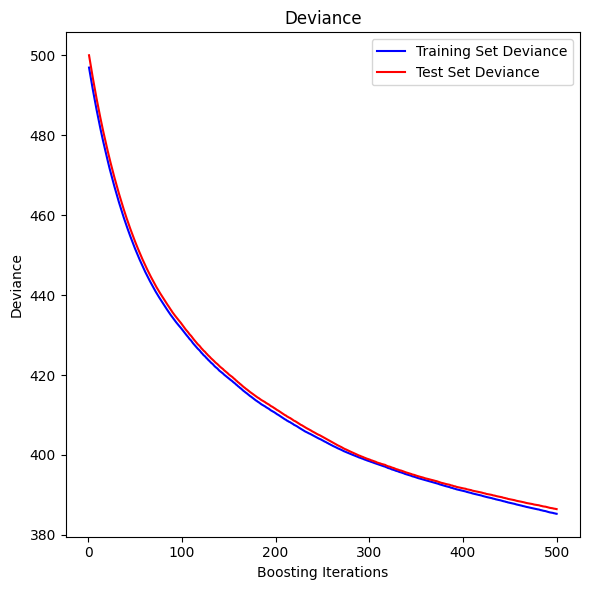

In [38]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(reg.staged_predict(X_test_no)):
    test_score[i] = mean_squared_error(y_test_no, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    reg.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

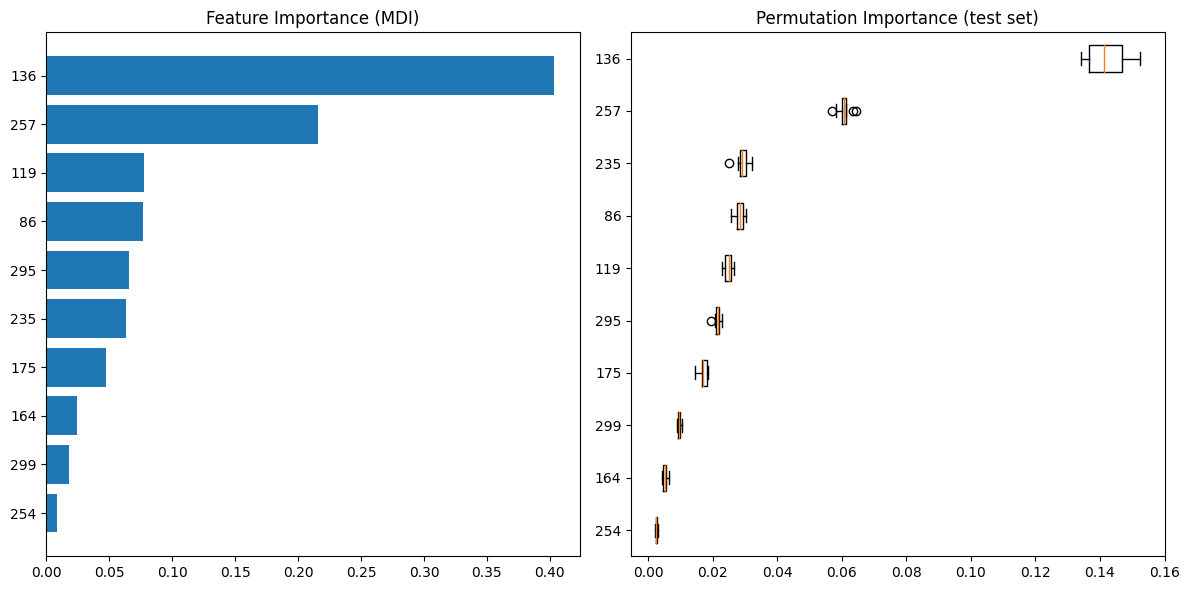

In [58]:
feature_importance = reg.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(df_no.FLTID)[sorted_idx])  # Corrected line
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    reg, X_test_no, y_test_no, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(df_no.FLTID)[sorted_idx],  # Corrected line
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()

'''the x-axis represents the value of the feature importance calculated through Mean Decrease in Impurity (MDI), 
which is a technique used in tree-based models to quantify how much each feature contributes to homogenizing the nodes within the trees'''

'''the x-axis represents the mean importance score over multiple shuffling (permutation) trials. 
This score is calculated by measuring the increase in the model's prediction error after permuting the feature's values.'''

In [423]:
#Verifying the length of y_test_no and final_preds
print(f"Length of y_test_no: {len(y_test_no)}")
print(f"Length of final_preds: {len(final_preds)}")

if len(y_test_no) == len(final_preds):
    # Plotting the actual vs predicted values
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test_no, final_preds, alpha=0.5)
    plt.plot([y_test_no.min(), y_test_no.max()], [y_test_no.min(), y_test_no.max()], 'k--', lw=2)  # Diagonal line
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title('Actual vs. Predicted Values')
    plt.show()
else:
    print("The lengths of y_test_no and final_preds do not match. Please check the data.")


Length of y_test_no: 9323
Length of final_preds: 17933
The lengths of y_test_no and final_preds do not match. Please check the data.


In [11]:
from sklearn.experimental import enable_halving_search_cv
# Now, you can import HalvingRandomSearchCV
from sklearn.model_selection import HalvingRandomSearchCV
from pprint import pprint
from sklearn.metrics import make_scorer
from sklearn.base import clone
from sklearn.metrics import mean_pinball_loss, mean_squared_error

In [12]:
from sklearn.experimental import enable_halving_search_cv  # noqa
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import make_scorer
from pprint import pprint

param_grid = dict(
    learning_rate=[0.1],
    max_depth=[2],
    min_samples_leaf=[1, 5],
    min_samples_split=[5, 10],
)
alpha = 0.05
neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, random_state=0)
search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(X_train_no, y_train_no)
pprint(search_05p.best_params_)

/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}


In [451]:


alpha = 0.95
neg_mean_pinball_loss_95p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
search_95p = clone(search_05p).set_params(
    estimator__alpha=alpha,
    scoring=neg_mean_pinball_loss_95p_scorer,
)
search_95p.fit(X_train_no, y_train_no)
pprint(search_95p.best_params_)

/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}


In [445]:
neg_mean_pinball_loss_05p_scorer = make_scorer(
    mean_pinball_loss,
    alpha=alpha,
    greater_is_better=False,  # maximize the negative loss
)
# Generate xx for predictions
xx = np.linspace(0, 10, 1000).reshape(-1, 1)

In [443]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_pinball_loss, mean_squared_error

all_models = {}
common_params = dict(
    learning_rate=0.05,
    n_estimators=200,
    max_depth=2,
    min_samples_leaf=9,
    min_samples_split=9,
)
for alpha in [0.05, 0.5, 0.95]:
    gbr = GradientBoostingRegressor(loss="quantile", alpha=alpha, **common_params)
    all_models["q %1.2f" % alpha] = gbr.fit(X_train_no, y_train_no)

In [444]:
def coverage_fraction(y, y_low, y_high):
    return np.mean(np.logical_and(y >= y_low, y <= y_high))


coverage_fraction(
    y_train_no,
    all_models["q 0.05"].predict(X_train_no),
    all_models["q 0.95"].predict(X_train_no),
)

0.9577244880932516

In [454]:
# Make sure your models are defined or loaded properly before this
all_models = {
    "mse": gbm_regressor_mean,  # Replace model_mean with your actual model variable for mean predictions
    "q 0.05": gbm_regressor_05p,  # Replace model_05p with your model for 5th percentile predictions
    "q 0.95": model_95p,  # Replace model_95p with your model for 95th percentile predictions
    "q 0.50": model_median  # Replace model_median with your model for median predictions
}

# Example of making predictions
# Ensure xx is correctly defined as your input feature range for predictions
y_pred = all_models["mse"].predict(xx)
y_lower = all_models["q 0.05"].predict(xx)
y_upper = all_models["q 0.95"].predict(xx)
y_med = all_models["q 0.50"].predict(xx)



NameError: name 'model_for_mean_prediction' is not defined

In [452]:
import matplotlib.pyplot as plt

xx = np.linspace(0, 10, 1000).reshape(-1, 1)

y_pred = all_models["mse"].predict(xx)
y_lower = all_models["q 0.05"].predict(xx)
y_upper = all_models["q 0.95"].predict(xx)
y_med = all_models["q 0.50"].predict(xx)

fig = plt.figure(figsize=(10, 10))
plt.plot(xx, f(xx), "g:", linewidth=3, label=r"$f(x) = x\,\sin(x)$")
plt.plot(X_test_no, y_test_no, "b.", markersize=10, label="Test observations")
plt.plot(xx, y_med, "r-", label="Predicted median")
plt.plot(xx, y_pred, "r-", label="Predicted mean")
plt.plot(xx, y_upper, "k-")
plt.plot(xx, y_lower, "k-")
plt.fill_between(
    xx.ravel(), y_lower, y_upper, alpha=0.4, label="Predicted 90% interval"
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 25)
plt.legend(loc="upper left")
plt.show()

KeyError: 'mse'

/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 4 is smaller than n_iter=5. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'learning_rate': 0.1,
 'max_depth': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 150}


NameError: name 'y_upper' is not defined

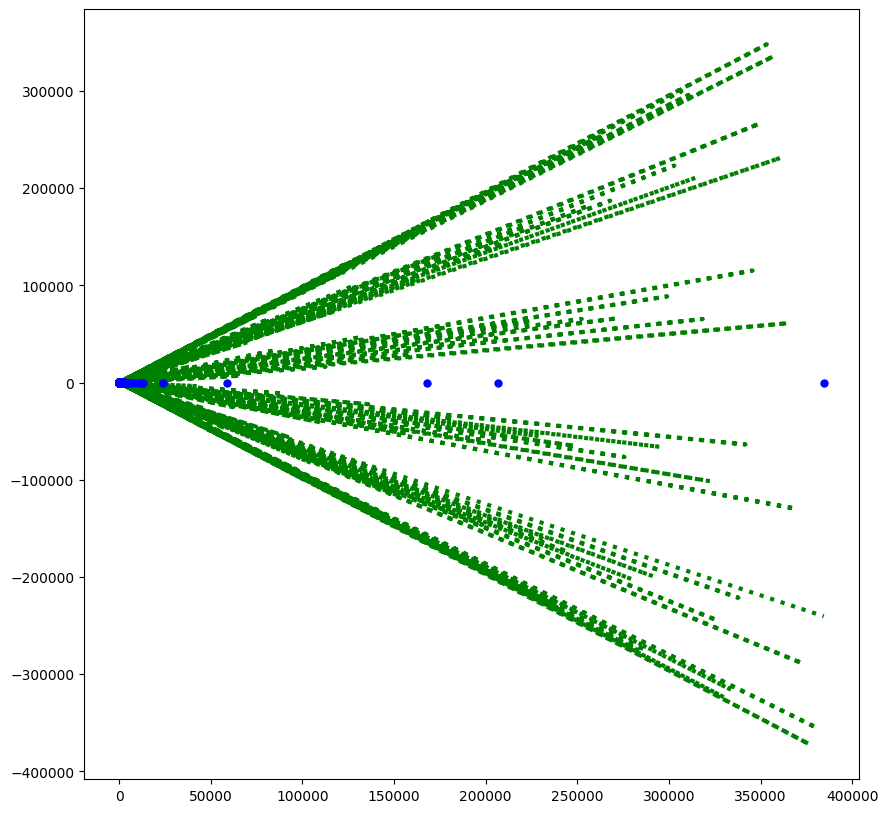

In [453]:
search_05p = HalvingRandomSearchCV(
    gbr,
    param_grid,
    resource="n_estimators",
    max_resources=250,
    min_resources=50,
    scoring=neg_mean_pinball_loss_05p_scorer,
    n_jobs=2,
    random_state=0,
).fit(X_train_no, y_train_no)
pprint(search_05p.best_params_)
# Example definition of xx, adjust as needed based on your data's range
xx = np.linspace(X_test_no.min(), X_test_no.max(), 100).reshape(-1, 1)

# Theoretical function f(x) = x*sin(x), adjust as per your requirements
def f(x):
    return x * np.sin(x)

coverage_fraction(y_train_no, search_05p.predict(X_train_no), search_95p.predict(X_train_no))
# Your provided plotting code, assuming xx and f(xx) are defined as above
fig = plt.figure(figsize=(10, 10))
plt.plot(xx, f(xx), "g:", linewidth=3, label=r"$f(x) = x\,\sin(x)$")
plt.plot(X_test_no, y_test_no, "b.", markersize=10, label="Test observations")
plt.plot(xx, y_upper, "k-", label="95% Predicted Upper Bound")
plt.plot(xx, y_lower, "k-", label="5% Predicted Lower Bound")
plt.fill_between(
    xx.ravel(), y_lower, y_upper, alpha=0.4, label="Predicted 90% Interval"
)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 25)
plt.legend(loc="upper left")
plt.title("Prediction with Tuned Hyper-Parameters")
plt.show()

In [427]:

# Predictions and evaluation without outliers
y_pred_gbm_no_outliers = gbm_regressor.predict(X_test_no)
mae_gbm_no_outliers = mean_absolute_error(y_test_no, y_pred_gbm_no_outliers)
#train_mae_gbm_no_outliers = mean_absolute_error(X_train_no, y_train_no)
rmse_gbm_no_outliers = np.sqrt(mean_squared_error(y_test_no, y_pred_gbm_no_outliers))
#train_rmse_gbm_no_outliers = np.sqrt(mean_squared_error(X_train_no, y_train_no))
r2_gbm_no_outliers = r2_score(y_test_no, y_pred_gbm_no_outliers)
#train_r2_gbm_no_outliers = r2_score(X_train_no, y_train_no)

print(f"GBM Results After Removing Outliers:")
print(f"Mean Absolute Error (MAE): {mae_gbm_no_outliers}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm_no_outliers}")
print(f"R^2 Score: {r2_gbm_no_outliers}")
# Evaluate the model using mean squared error (MSE)
mse = mean_squared_error(y_test_no, y_pred_gbm_no_outliers)
print("Mean Squared Error (MSE):", mse)

/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


NotFittedError: This GradientBoostingRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [13]:
#Random Search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from scipy.stats import randint as sp_randint
# Define the parameter distribution to sample from
param_dist = {
    'n_estimators': sp_randint(100, 400),
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': sp_randint(3, 6)
}
# Initialize the GBM model
gbm = GradientBoostingRegressor(random_state=42)
# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=gbm, param_distributions=param_dist, n_iter=10, cv=5, scoring='r2', verbose=2, random_state=42, n_jobs=-1)
# Fit the model
random_search.fit(X_train_no, y_train_no)
# Best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best R^2 Score:", random_search.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=370; total time=  32.4s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=370; total time=  33.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=370; total time=  33.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=370; total time=  33.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=120; total time=  12.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=120; total time=  12.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=120; total time=  12.0s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=120; total time=  10.1s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=120; total time=  10.2s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=370; total time=  33.4s
[CV] END ...learning_rate=0.1, max_depth=4, n_estimators=314; total time=  34.7s
[CV] END ...learning_rate=0.1, max_depth=4, n_es

In [363]:
from sklearn.ensemble import RandomForestRegressor
model_randomforest = RandomForestRegressor(n_estimators=103, max_depth=10, min_samples_split=5,max_features = 'auto', n_jobs=-1, min_samples_leaf=10,random_state=0)


# Train the model
model_randomforest.fit(X_train_no, y_train_no)

# Make predictions
y_pred = gbm_regressor.predict(X_test_no)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_no, y_pred)
r2 = r2_score(y_test_no, y_pred)

mse = mean_squared_error(y_test_no, y_pred)
r2 = r2_score(y_test_no, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Mean Squared Error: 333.1945091622182
R^2 Score: 0.3356183017090276


In [364]:

# Predictions and evaluation without outliers
y_pred_gbm_no_outliers = gbm_regressor.predict(X_test_no)
mae_gbm_no_outliers = mean_absolute_error(y_test_no, y_pred_gbm_no_outliers)
rmse_gbm_no_outliers = np.sqrt(mean_squared_error(y_test_no, y_pred_gbm_no_outliers))
r2_gbm_no_outliers = r2_score(y_test_no, y_pred_gbm_no_outliers)

print(f"GBM Results After Removing Outliers:")
print(f"Mean Absolute Error (MAE): {mae_gbm_no_outliers}")
print(f"Root Mean Squared Error (RMSE): {rmse_gbm_no_outliers}")
print(f"R^2 Score: {r2_gbm_no_outliers}")


GBM Results After Removing Outliers:
Mean Absolute Error (MAE): 12.713410461813618
Root Mean Squared Error (RMSE): 18.253616331078568
R^2 Score: 0.3356183017090276


In [308]:
# K-Nearest Neighbors Regressor
# K-Nearest Neighbors Regressor
knn_regressor = KNeighborsRegressor(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)
knn_regressor.fit(X_train_no, y_train_no)
knn_predictions = knn_regressor.predict(X_test_no)

In [309]:
# Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_no, y_train_no)
rf_predictions = rf_regressor.predict(X_test_no)

In [311]:
# Compute R² score
knn_r2 = r2_score(y_test_no, knn_predictions)
rf_r2 = r2_score(y_test_no, rf_predictions)

knn_r2, rf_r2

(0.13076916601837607, 0.31660011723117953)

In [312]:
# getting better MAE!
def mae_function(y_true, y_pred):
    absolut_error = np.abs((y_true - y_pred))
    return np.mean(absolut_error)

In [291]:
# getting better MSE (or RMSE)!
def mse_function(y_true, y_pred, root=False):
    squared_error = np.power((y_true - y_pred), 2)
    if root:
        return np.sqrt(np.mean(squared_error))
    else: 
        return np.mean(squared_error)

In [292]:
# getting better R-squared!
def r2_function(y_true, y_pred):
    ssr = np.sum(np.power((y_true - y_pred), 2))
    sst = np.sum(np.power((y_true - np.mean(y_true)), 2))
    return 1 - (ssr/sst)

In [329]:
# Fit model on train data
# model 1
linreg = LinearRegression(n_jobs=-1) 
linreg.fit(X_train_no, y_train_no)

# Make prediction on test data
y_pred = linreg.predict(X_test_no)

In [294]:
# MAE function 
print("MAE with self-implemented function: ", mae_function(y_test_no, y_pred))

# MAE scikit-learn function 
print("MAE with scikit-learn function: ", mean_absolute_error(y_test_no, y_pred))

MAE with self-implemented function:  15.392181685232147
MAE with scikit-learn function:  15.392181685232147


In [330]:
# MSE own function 
print(" MSE with self-implemented function: ", mse_function(y_test_no, y_pred))
print("RMSE with self-implemented function: ", mse_function(y_test_no, y_pred, root=True))

# MSE scikit-learn function 
print("MSE with scikit-learn function: ", mean_squared_error(y_test_no, y_pred))
print("RMSE with scikit-learn function: ", mean_squared_error(y_test_no, y_pred, squared=False))

 MSE with self-implemented function:  435.8001999889657
RMSE with self-implemented function:  20.875828127022068
MSE with scikit-learn function:  435.8001999889657
RMSE with scikit-learn function:  20.875828127022068


In [331]:
 # R-squared own function 
print("R-squared with self-implemented function: ", r2_function(y_test_no, y_pred))

# R-squared scikit-learn function 
print("    R-squared with scikit-learn function: ", r2_score(y_test_no, y_pred))

R-squared with self-implemented function:  0.12420091449363013
    R-squared with scikit-learn function:  0.12420091449363013


In [297]:
y_pred_train = linreg.predict(X_train_no)
y_pred_test = linreg.predict(X_test_no)

In [ ]:
# # Calculate metrics for training data
# train_mae = mean_absolute_error(y_train_no, y_pred_train_no)
# train_rmse = np.sqrt(mean_squared_error(y_train_no, y_pred_train_no))
# train_r2 = r2_score(y_train_no, y_pred_train_no)
# # Predictions on test data
# y_pred_test_no = gbm_regressor.predict(X_test_no)
# # Calculate metrics for test data
# test_mae = mean_absolute_error(y_test_no, y_pred_test_no)
# test_rmse = np.sqrt(mean_squared_error(y_test_no, y_pred_test_no))
# test_r2 = r2_score(y_test_no, y_pred_test_no)
# print(“GBM Results for Training Data:“)
# print(f”Mean Absolute Error (MAE): {train_mae}“)
# print(f”Root Mean Squared Error (RMSE): {train_rmse}“)
# print(f”R^2 Score: {train_r2}“)
# print(“\nGBM Results for Test Data:“)
# print(f”Mean Absolute Error (MAE): {test_mae}“)
# print(f”Root Mean Squared Error (RMSE): {test_rmse}“)
# print(f”R^2 Score: {test_r2}“)

In [332]:
def calculate_metrics(y_true_train, y_pred_train, y_true_test, y_pred_test):
    """
    Calculate and print RMSE and R^2 metrics for both training and test datasets.
    
    Args:
        y_true_train (array-like): True values of the target variable for the training set.
        y_pred_train (array-like): Predicted values of the model for the training set.
        y_true_test (array-like): True values of the target variable for the test set.
        y_pred_test (array-like): Predicted values of the model for the test set.
    """
    # Calculate and print metrics for the training set
    print("Metrics on training data:")
    rmse_train = np.sqrt(mean_squared_error(y_true_train, y_pred_train))
    r2_train = r2_score(y_true_train, y_pred_train)
    print(f"RMSE (Train): {rmse_train:.3f}")
    print(f"R^2 (Train): {r2_train:.3f}")
    print("---" * 10)
    
    # Calculate and print metrics for the test set
    print("Metrics on test data:")
    rmse_test = np.sqrt(mean_squared_error(y_true_test, y_pred_test))
    r2_test = r2_score(y_true_test, y_pred_test)
    print(f"RMSE (Test): {rmse_test:.3f}")
    print(f"R^2 (Test): {r2_test:.3f}")
    print("---" * 10)

# Example usage:
calculate_metrics(y_train_no, y_pred_train, y_test_no, y_pred_test)


Metrics on training data:
RMSE (Train): 20.946
R^2 (Train): 0.121
------------------------------
Metrics on test data:
RMSE (Test): 20.876
R^2 (Test): 0.124
------------------------------


In [314]:
# Define a range of alpha values to explore
alphas = [0.1, 1.0, 10.0, 100.0]

# Initialize and fit the Ridge regression model
ridge_model = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_model.fit(X_train_no, y_train_no)
# Predict on the test set
y_pred_ridge = ridge_model.predict(X_test_no)

# Calculate and print performance metrics
print("Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test_no, y_pred_ridge)))
print("Ridge Regression R^2:", r2_score(y_test_no, y_pred_ridge))

Ridge Regression RMSE: 20.875822321177942
Ridge Regression R^2: 0.12420140163619875


In [315]:
# Initialize and fit the Lasso regression model
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train_no, y_train_no)
# Predict on the test set
y_pred_lasso = lasso_model.predict(X_test_no)
# Calculate and print performance metrics
print("Lasso Regression RMSE:", np.sqrt(mean_squared_error(y_test_no, y_pred_lasso)))
print("Lasso Regression R^2:", r2_score(y_test_no, y_pred_lasso))

Lasso Regression RMSE: 20.93101498056392
Lasso Regression R^2: 0.11956430980112043


In [316]:
# Define a range of alpha values to explore
alphas = [0.1, 1.0, 10.0, 100.0]

# Create a Ridge regression model with cross-validation
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')

# Optionally, create a pipeline to scale features before fitting the model
pipeline = make_pipeline(StandardScaler(with_std=2), ridge_cv)

# Fit the model (and scale features)
pipeline.fit(X_train_no, y_train_no)

# Predict on the test set using the best model found
y_pred_ridge_cv = pipeline.predict(X_test_no)

# Calculate performance metrics
print("Optimized Ridge Regression RMSE:", np.sqrt(mean_squared_error(y_test_no, y_pred_ridge_cv)))
print("Optimized Ridge Regression R^2:", r2_score(y_test_no, y_pred_ridge_cv))


/Users/modilafta/Jalape-o/smf_airlines-/.venv/lib/python3.11/site-packages/sklearn/utils/_param_validation.py:558: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Optimized Ridge Regression RMSE: 20.875831413019483
Optimized Ridge Regression R^2: 0.12420063878013587


# 4 models linear, rdge and ölasso , randomforest, linear  and plot them

In [14]:
import matplotlib.pyplot as plt

# Assuming linreg, ridge_cv, lasso_model, and gbm_regressor are already fitted models
plt.figure(figsize=(6, 4))

# Add vertical lines to emphasize the coefficient/importance magnitude for each point
# For Linear Regression coefficients
plt.vlines(range(len(linreg.coef_)), 0, linreg.coef_, color='red', linewidth=1, alpha=0.5)
# For Ridge coefficients
plt.vlines(range(len(ridge_cv.coef_)), 0, ridge_cv.coef_, color='green', linewidth=1, alpha=0.5)
# For Lasso coefficients
plt.vlines(range(len(lasso_model.coef_)), 0, lasso_model.coef_, color='blue', linewidth=1, alpha=0.5)
# For GBM feature importances
plt.vlines(range(len(gbm_regressor.feature_importances_)), 0, gbm_regressor.feature_importances_, color='orange', linewidth=1, alpha=0.5)

# Plot the points after adding the vertical lines to ensure they are on top and visible
# Linear regression without regularization
plt.plot(linreg.coef_, 'o', alpha=0.5, label="Linear Regression", color='red')
# Ridge regression with alpha value
plt.plot(ridge_cv.coef_, 'v', label="Ridge", color='green')
# Lasso regression with alpha value
plt.plot(lasso_model.coef_, 's', label="Lasso", color='blue')
# Feature importances for Gradient Boosting Regressor
plt.plot(gbm_regressor.feature_importances_, '^', label="GBM Feature Importances", color='orange')

plt.xlabel("Feature index", fontsize=9)
plt.ylabel("Coefficient magnitude / Feature importance", fontsize=9)
plt.hlines(0, 0, len(linreg.coef_) - 1, colors='gray', linestyles='dashed', alpha=0.5)
plt.legend(fontsize=9, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=2)

plt.show()

NameError: name 'linreg' is not defined

<Figure size 600x400 with 0 Axes>

In [345]:
# Assume `model` is your trained regression model and `X_new` is new data for prediction
predicted_delays = linreg.predict(X_no)

# Setting a threshold for significant delays
threshold = 15  # minutes
predicted_class = np.where(predicted_delays > threshold, 1, 0)

# Estimated "probability" of delay could be interpreted from the magnitude of delays in a relative sense
# For binary classification approach
prob_delay = np.mean(predicted_class) * 100  # Percent of flights likely to be delayed

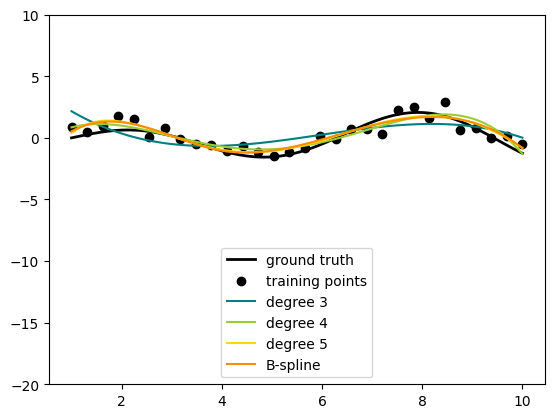

In [349]:
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, SplineTransformer
from sklearn.linear_model import Ridge
import numpy as np

# Sample data generation function (replace with actual function)
def f(x):
    return np.sin(x) * np.log(x)

# Sample data (replace with actual data)
np.random.seed(0)
x_plot = np.linspace(1, 10, 100)
X_plot = x_plot[:, np.newaxis]
x_train = np.linspace(1, 10, 30)
X_train = x_train[:, np.newaxis]
y_train = f(x_train) + np.random.randn(x_train.shape[0]) * 0.5

# plot function
lw = 2
fig, ax = plt.subplots()
ax.set_prop_cycle(color=["black", "teal", "yellowgreen", "gold", "darkorange", "tomato"])
ax.plot(x_plot, f(x_plot), linewidth=lw, label="ground truth")

# plot training points
ax.scatter(x_train, y_train, label="training points")

# polynomial features
for degree in [3, 4, 5]:
    model = make_pipeline(PolynomialFeatures(degree), Ridge(alpha=1e-3))
    model.fit(X_train, y_train)
    y_plot = model.predict(X_plot)
    ax.plot(x_plot, y_plot, label=f"degree {degree}")

# B-spline with 4 + 3 - 1 = 6 basis functions
model = make_pipeline(SplineTransformer(n_knots=4, degree=3), Ridge(alpha=1e-3))
model.fit(X_train, y_train)

y_plot = model.predict(X_plot)
ax.plot(x_plot, y_plot, label="B-spline")
ax.legend(loc="lower center")
ax.set_ylim(-20, 10)
plt.show()


The degrees mentioned in the context of polynomial regression and B-splines refer to the complexity of the models being used to fit the data.

Polynomial Regression Degrees
For polynomial regression, the degree indicates the highest power of the input variable in the polynomial equation. A polynomial regression model tries to fit a polynomial equation of a specific degree to the observed data. The degree of the polynomial defines the model's complexity:

Degree 1: Linear regression (a straight line).
Degree 2: Quadratic regression (can model curves with a single peak or valley).
Degree 3: Cubic regression (can model more complex curves than quadratic).
Degrees higher than 3: Can model increasingly complex data patterns but may also lead to overfitting if the degree is too high.
In the provided code, polynomial features of degrees 3, 4, and 5 are used to create polynomial regression models. These models are more complex than linear regression and can fit more complicated data patterns.

B-spline Degree
The B-spline degree in the context of the SplineTransformer refers to the degree of the spline functions used to approximate the data. Splines are piecewise polynomials that are defined within specific intervals of the data range, with the pieces connected smoothly at certain points known as knots.

Degree of B-spline: Determines the smoothness of the spline curve. A higher degree means the curve can be more complex and smoother.
Degree 3: Common choice, offering a good balance between flexibility and smoothness.
The B-spline with 4 knots and degree 3 mentioned in your code is a model that uses cubic splines (degree 3 polynomials) to fit the data. The knots are specific points that help determine where the pieces of the spline join. The formula "4 + 3 - 1 = 6 basis functions" suggests the calculation for determining the number of basis functions (or effectively the pieces of polynomials) used in the spline model, although the exact interpretation may depend on the context of how the spline is applied.

In summary, these degrees help define the complexity and flexibility of the models being used to fit the data, with polynomial degrees determining the power of polynomial regression models and the B-spline degree determining the smoothness of the spline curve.

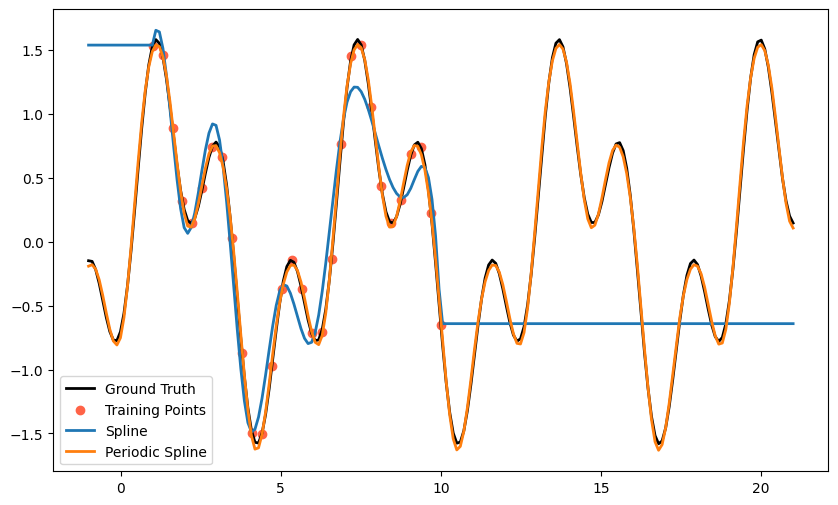

In [351]:
from sklearn.preprocessing import SplineTransformer

# Define the function to be approximated
def target_function(x):
    """Compute the target function to be approximated."""
    return np.sin(x) - 0.7 * np.cos(3 * x)

# Generate training data
y_train = target_function(x_train)

# Prepare extended test data for plotting
x_extended = np.linspace(-1, 21, 200)
X_extended = x_extended[:, np.newaxis]

# Set up plot
plt.figure(figsize=(10, 6))
plt.plot(x_extended, target_function(x_extended), linewidth=2, label="Ground Truth", color="black")
plt.scatter(x_train, y_train, label="Training Points", color="tomato")

# Define models for comparison
models = [
    (SplineTransformer(degree=3, n_knots=10), "Spline"),
    (SplineTransformer(degree=3, knots=np.linspace(0, 2 * np.pi, 10)[:, None], extrapolation="periodic"), "Periodic Spline"),
]

# Train and plot predictions for each model
for transformer, name in models:
    pipeline = make_pipeline(transformer, Ridge(alpha=1e-3))
    pipeline.fit(X_train, y_train)
    y_predicted = pipeline.predict(X_extended)
    plt.plot(x_extended, y_predicted, label=name, linewidth=2)

# Customize and show the plot
plt.legend()
plt.show()


* A spline is a piecewise polynomial function used in interpolation. 
The spline function is broken down into intervals, and within each interval, a polynomial is fit to the data. This method is often used in smoothing data or creating a function that can approximate a more complex curve.

* A periodic spline is a special case of the spline where the end conditions are set such that the function values and their derivatives at the end of the interval are equal to those at the beginning. This ensures that the spline is smooth and continuous, not just within the range of the data, but it also loops back on itself in a smooth manner, mimicking periodic behavior.

In the context of the  graph:    
* The training points are the data points used to train the models. These points are scattered on the graph, and they are colored "tomato". * * The training points are sampled from the target function.
* The ground truth is the actual function being approximated. In the plot, this is represented by the black line, which is the function sin⁡(x)−0.7cos⁡(3x)sin(x)−0.7cos(3x). This is what the spline interpolations are trying to approximate.
* The Spline line in the plot is the approximation created by the spline model without periodic constraints.
* The Periodic Spline line is the approximation created by a spline model that has been set up to be periodic, which means it would be a good choice for approximating functions that are inherently periodic, like sine and cosine functions.

In [358]:
xx = np.atleast_2d(np.linspace(0, 10, 1000)).T

In [355]:
gbm_regressorg = gbm_regressor.fit(X_train, y_train)

In [359]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your gbm_regressor dictionary is correctly set up like this:
# gbm_regressor = {
#     "mse": model_for_mse,
#     "q 0.05": model_for_lower_quantile,
#     "q 0.95": model_for_upper_quantile,
#     "q 0.50": model_for_median,
# }

# Generate xx for predictions
xx = np.linspace(0, 10, 1000).reshape(-1, 1)

# Generate predictions
predicted_mean = gbm_regressor["mse"].predict(xx)
predicted_lower_quantile = gbm_regressor["q 0.05"].predict(xx)
predicted_upper_quantile = gbm_regressor["q 0.95"].predict(xx)
predicted_median = gbm_regressor["q 0.50"].predict(xx)

# Plotting setup
plt.figure(figsize=(10, 10))
plt.plot(xx, f(xx), "g:", linewidth=3, label=r"$f(x) = x\,\sin(x)$")
plt.plot(X_test_no, y_test_no, "b.", markersize=10, label="Test observations")
plt.plot(xx, predicted_median, "r-", label="Predicted median")
plt.plot(xx, predicted_mean, "r--", label="Predicted mean")
plt.plot(xx, predicted_upper_quantile, "k-", label="Upper 95% quantile")
plt.plot(xx, predicted_lower_quantile, "k-", label="Lower 5% quantile")
plt.fill_between(xx.ravel(), predicted_lower_quantile, predicted_upper_quantile, color='gray', alpha=0.4, label="Predicted 90% interval")

plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.ylim(-10, 25)
plt.legend(loc="upper left")
plt.show()


IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

## new features in the duration flight to balance the data 

In [378]:
df6= df_no.copy()

In [400]:
df6['target'] = df6['target'].astype(int)

In [412]:
total_flights = len(df6)

# Count the number of flights with 'target' less than 0.05
flights_less_than_05 = df6[df6['target'] < ].shape[0]

# Calculate the percentage of flights with 'target' less than 0.05
percentage_less_than_05 = (flights_less_than_05 / total_flights) * 100

print(f"Total flights: {total_flights}")
print(f"Flights with 'target' less than 0.05: {flights_less_than_05}")
print(f"Percentage of flights with 'target' less than 0.05: {percentage_less_than_05:.2f}%")


Total flights: 93225
Flights with 'target' less than 0.05: 42767
Percentage of flights with 'target' less than 0.05: 45.88%


In [407]:
df6.loc[df6['target'] < 6, 'target'] = 0

In [401]:
df6

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Year,Month,Day,Weekday,flight_duration
1,train_id_1,2016-01-13,257,86,119,2016-01-13 15:05:00,2016-01-13 16:55:00,0,28,20,2016,1,13,2,110.0
2,train_id_2,2016-01-16,86,123,58,2016-01-16 04:10:00,2016-01-16 06:45:00,0,46,0,2016,1,16,5,155.0
3,train_id_3,2016-01-17,164,37,91,2016-01-17 14:10:00,2016-01-17 17:00:00,0,50,0,2016,1,17,6,170.0
4,train_id_4,2016-01-17,136,123,4,2016-01-17 14:30:00,2016-01-17 15:50:00,0,34,22,2016,1,17,6,80.0
5,train_id_5,2016-01-17,119,117,119,2016-01-17 16:20:00,2016-01-17 18:15:00,0,54,53,2016,1,17,6,115.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107828,train_id_107828,2018-07-05,1859,123,119,2018-07-05 23:00:00,2018-07-06 02:00:00,4,44,0,2018,7,5,3,180.0
107829,train_id_107829,2018-01-13,1747,37,119,2018-01-13 08:00:00,2018-01-13 09:00:00,4,60,0,2018,1,13,5,60.0
107830,train_id_107830,2018-11-07,75,123,119,2018-11-07 05:00:00,2018-11-07 12:50:00,4,50,0,2018,11,7,2,470.0
107831,train_id_107831,2018-01-23,1752,123,37,2018-01-23 18:00:00,2018-01-23 18:45:00,0,58,0,2018,1,23,1,45.0


In [377]:
# Check the count of 0 and non-zero values in the target variable
target_counts = df6['target'].value_counts()

# Print the counts
# Print the counts
print("Count of 0 in the target variable:", target_counts.get(0, 0))
print("Count of non-zero values in the target variable:", target_counts.sum() - target_counts.get(0, 0))

Count of 0 in the target variable: 38168
Count of non-zero values in the target variable: 55057


In [413]:
# Removing Outliers
Q1 = df6['target'].quantile(0.25)
Q3 = df6['target'].quantile(0.75)
IQR = Q3 - Q1
multiplier = 1.5
outliers = df6[(df6['target'] < (Q1 - multiplier * IQR)) | (df6['target'] > (Q3 + multiplier * IQR))]
df6 = df6[~df6.index.isin(outliers.index)]

# Define the features and the target variable without outliers
X = df6.drop(['ID', 'DATOP', 'STD', 'STA', 'target'], axis=1)
y = df6['target']

# Handling any remaining NaN values
X.fillna(0, inplace=True)


In [414]:
# Splitting the dataset into training and testing sets without outliers
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


gbm_regressor = GradientBoostingRegressor(n_estimators=182,max_depth =30,max_features = 'sqrt',min_samples_split=10,min_samples_leaf=10, learning_rate=0.01, random_state=42)
#model_gbm = GradientBoostingRegressor()
gbm_regressor.fit(X_train, y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=30, max_features='sqrt',
                          min_samples_leaf=10, min_samples_split=10,
                          n_estimators=182, random_state=42)

In [418]:
# Base models
gbm_regressor2 = GradientBoostingRegressor(n_estimators=182, max_depth=30, max_features='sqrt', min_samples_split=10, min_samples_leaf=10, learning_rate=0.01, random_state=42)
random_forest2 = RandomForestRegressor(n_estimators=100, random_state=42)
linear_model2 = LinearRegression()

In [419]:

# Training base models
gbm_regressor2.fit(X_train, y_train)
random_forest2.fit(X_train, y_train)
linear_model2.fit(X_train, y_train)

# Predictions from base models
preds_gbm = gbm_regressor2.predict(X_test)
preds_rf = random_forest2.predict(X_test)
preds_lm = linear_model2.predict(X_test)

# Creating meta-features
meta_features = np.column_stack([preds_gbm, preds_rf, preds_lm])

# Meta-model
meta_model = LinearRegression()
meta_model.fit(meta_features, y_test)  # In practice, you should use a separate validation set here

# Final prediction
final_preds = meta_model.predict(meta_features)

# Evaluation
mae = mean_absolute_error(y_test, final_preds)
rmse = np.sqrt(mean_squared_error(y_test, final_preds))
r2 = r2_score(y_test, final_preds)

print("Stacked Model Results After Removing Outliers:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 Score: {r2}")


Stacked Model Results After Removing Outliers:
Mean Absolute Error (MAE): 10.045122192568352
Root Mean Squared Error (RMSE): 13.999414849636029
R^2 Score: 0.3611180442897912


In [420]:

# Parameter grid for GradientBoostingRegressor
param_grid = {
    'n_estimators': [300],
    'max_depth': [10],
    'min_samples_split': [10],
    'min_samples_leaf': [4],
    'learning_rate': [0.2]
}

# Initialize the GradientBoostingRegressor
gbm_regressor = GradientBoostingRegressor(random_state=42)

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=gbm_regressor, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters:", grid_search.best_params_)
print("Best R^2 Score:", grid_search.best_score_)

# Using the best parameters from the grid search to create a new model
gbm_regressor_optimized = GradientBoostingRegressor(**grid_search.best_params_, random_state=42)
gbm_regressor_optimized.fit(X_train, y_train)

# Make predictions with the optimized model
y_pred_optimized = gbm_regressor_optimized.predict(X_test)
optimized_r2 = r2_score(y_test, y_pred_optimized)

print(f"Optimized R^2 Score: {optimized_r2}")


Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time= 1.7min
[CV] END learning_rate=0.2, max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  46.9s
Best Parameters: {'learning_rate': 0.2, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 300}
Best R^2 Score: 0.3505139029147017
Optimized R^2 Score: 0.37323651424404003
